题目：

数据集：data/ex7data1.mat。

要求：将二维数据降到一维。

## 1.导入数据集

1.导入库

In [1]:
import numpy as np
import scipy.io as sio
import matplotlib.pyplot as plt

2.导入数据集

In [2]:
mat = sio.loadmat('./data/ex7data1.mat')
X = mat['X']
X.shape

(50, 2)

3.绘制原始图像

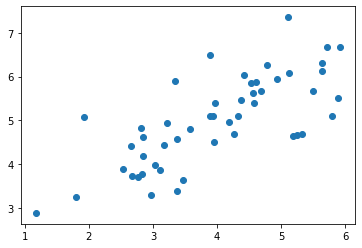

In [3]:
plt.scatter(X[:,0],X[:,1])
plt.show()

## 2.PCA 计算过程

#### 1.对X去均值化，使得特征的数值在可比较的范围之内

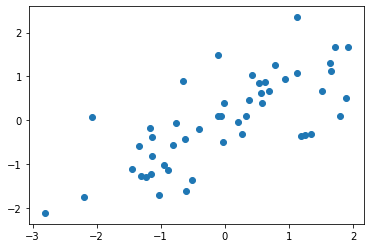

In [4]:
# 使数据都归一化到（-2,2）这个区间内
X_demean = X - np.mean(X,axis=0)
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.show()

#### 2. 计算协方差矩阵

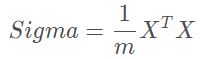

In [6]:
Sigma = X_demean.T @ X_demean / len(X)
Sigma

array([[1.34852518, 0.86535019],
       [0.86535019, 1.02641621]])

#### 3. 利用奇异值分解（SVD）来分解协方差矩阵，得到特征矩阵 Un×n

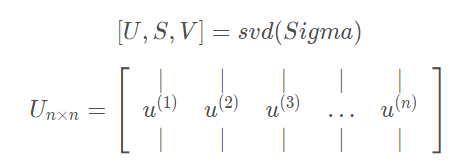

In [9]:
U,S,V = np.linalg.svd(Sigma)
print(S)
print('-----------------------------------------------')
print(U)

[2.06768062 0.30726078]
-----------------------------------------------
[[-0.76908153 -0.63915068]
 [-0.63915068  0.76908153]]


In [11]:
U1 = U[:,0]

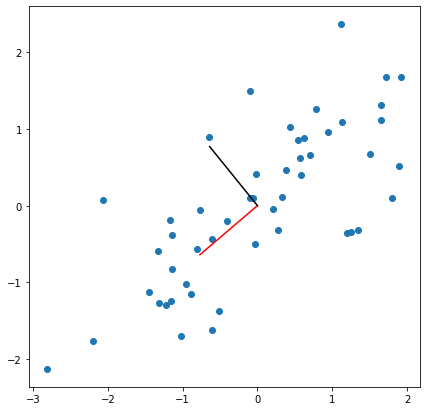

In [12]:
plt.figure(figsize=(7,7))
plt.scatter(X_demean[:,0],X_demean[:,1])
plt.plot([0,U1[0]],[0,U1[1]],c='r')         # 红线代表主成分特征向量
plt.plot([0,U[:,1][0]],[0,U[:,1][1]],c='k') # 黑线代表次成分特征向量
plt.show()

#### 4. 实现降维

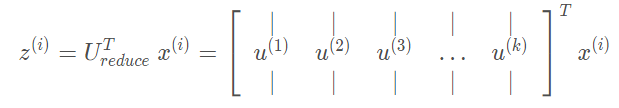

In [13]:
X_reduction = X_demean@U1

In [14]:
U_reduce = U[:,0]                            # 取第一列作为降维后的特征向量 #(2,)
U_reduce = U_reduce.reshape((2,1))           #(2,1)
z = X_demean @ U_reduce 
z.shape

(50, 1)

#### 5. 还原数据

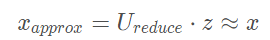

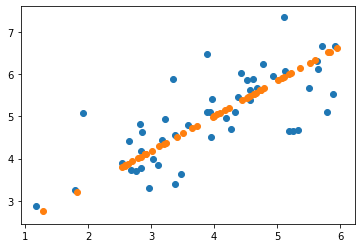

In [16]:
X_approx = z @ U_reduce.T + np.mean(X,axis=0) #(50,2) 加上均值是为了还原到原始坐标系
plt.scatter(X[:,0],X[:,1])
plt.scatter(X_approx[:,0],X_approx[:,1])
plt.show()